# Import

In [1]:
import numpy as np
import scipy.integrate as i
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c
from shooting import *
import scipy.optimize as o
import scipy.integrate as integ
import pandas as pd

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Computer Modern Roman"],
# })
plt.rcParams.update(plt.rcParamsDefault)

f = 16

# import cmath as cm
from shooting import *
import shootingres as shr
import shooting as sho

import scipy.optimize as o
try:
    import cPickle as pickle
except ImportError:
    import pickle
    
import ray

import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.set_style("ticks")
sns.set_style("ticks",{'axes.grid' : True})
import scienceplots
plt.style.use('science')
import numba
f = 16


# Function

In [2]:
## SET CONSTANTS
rho = (1.0*10**19) * (2.0*1.6725*10**(-27))
mu_0 = 1.2566*10**(-6)

# Define Normalizations
r1 = 0.1

## Define OMEGA0:
bb = 10000
v0 = bb/np.sqrt(r1)
Omega0 = v0/r1

In [3]:
data = pd.read_csv('Re750_4_0.1_0_to_1.txt', header = None, delim_whitespace=True)
r_f = data[0]
W = data[1]
W_f = i2.CubicSpline(r_f, W)
Wp_f = W_f.derivative()
Wpp_f = Wp_f.derivative()

# plt.figure()
# plt.plot(r_f, W_f(r_f))
# plt.plot(r_f, Wp_f(r_f))
# plt.plot(r_f,Wpp_f(r_f))
# plt.show()
# plt.close()
def shoot_hain_v3(w, eta, Pm, qr, qrp, qi, qip,  k=np.pi/2, m=1, B0=0, Bz = 0, keplerian=True, cc=1, r2=5, max=500, q=1/2):
    ## DIFF IS INCLUDES IMAG
    y0 = [0.,1.+1.j]
    y = i.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(w,eta, Pm, qr, qrp, qi, qip, m,k,B0,Bz, keplerian,cc, q), max_step=24./(max/r2))
    r = np.sqrt(y.t)
    u = y.y[0]
    return ((u/r)[-1])

### REDONE DERIVATION
def shoot_setup_hain_v2(x, y, w, elecd, Pm, k2rs, k2rps, k2is, k2ips, m, kz=np.pi/4, B0=60, Bz=12.967, keplerian=True, cc=1, q=1/2):
    mu_0 = 1.2566*10**(-6)
     ### PM = 1
    r = np.sqrt(x)
    k2 = k2rs(r) + 1j*k2is(r)
    k2p = k2rps(r) + 1j*k2ips(r)
    vp1 = 1
    if keplerian == True:
        W = vp1 / r**(3/2)
        Wp = -3/2 * vp1 / r**(5/2)
        Wpp = 5/2 * 3/2 * vp1 / r ** (7/2)
    elif keplerian == 'khalzov':
        W = vp1/x
        Wp = -vp1/x**2
    elif keplerian == 'rigid':
        W = vp1
        Wp = 0
    elif keplerian == 'Sh2':
        W = vp1/r**2
        Wp = -2*vp1/r**3
        Wpp = 6*vp1/r**4
    elif keplerian == False:
        vp = vp1/(x**(q/2))
        W = vp/r
        Wp = (-1*(q+1)/2)*(W/x)
    elif keplerian == 'saturated':
        A0 = 1.4923889E-02
        A1 = -1.0114824E-01
        A2 = 8.5753488E-02
        A3 = -2.8021088E-02
        A4 = -4.7882189E-01
        A5 = 1.0877462E-01
        A6 = 6.7857446E+00
        A7 = -5.0846913E+00
        A8 = -4.3114342E+01
        A9 = 5.2943846E+01
        A10 = 1.2219068E+02
        A11 = -1.9185099E+02
        A12 = -1.7535573E+02
        A13 = 3.4808679E+02
        A14 = 1.1975807E+02
        A15 = -3.4500839E+02
        A16 =  -1.4844420E+01
        A17 = 1.7930272E+02
        A18 = -2.5033736E+01
        ###  0.08875 + 0.91125/r^2 
        W = 0.08875 + 0.91125/r**2 + A0 + A1*(r-2) + A2*(r-2)**2+A3*(r-2)**3 + A4*(r-2)**4 + A5*(r-2)**5 + A6*(r-2)**6 + A7*(r-2)**7 + A8*(r-2)**8 + A9*(r-2)**9 + A10*(r-2)**10 + A11*(r-2)**11 + A12*(r-2)**12 + A13*(r-2)**13 + A14*(r-2)**14 + A15*(r-2)**15 + A16*(r-2)**16 + A17*(r-2)**17 + A18*(r-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**20
        Wp = - 2 * 0.91125/r**3  + A1 + 2*A2*(r-2) + 3*A3*(r-2)**2 + 4*A4*(r-2)**3 + 5*A5*(r-2)**4 + 6*A6*(r-2)**5 + 7*A7*(r-2)**6 + 8*A8*(r-2)**7 + 9*A9*(r-2)**8 + 10*A10*(r-2)**9 + 11*A11*(r-2)**10 + 12*A12*(r-2)**11 + 13*A13*(r-2)**12 + 14*A14*(r-2)**13 + 15*A15*(r-2)**14 + 16*A16*(r-2)**15 + 17*A17*(r-2)**16 + 18*A18*(r-2)**17 - 19*( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**18 - 20*( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**19
        Wpp = 3 * 2 * 0.91125/r**4  + 2*A2 + 3 * 2 * A3*(r-2) + 4 * 3 * A4*(r-2)**2 + 5 * 4 * A5*(r-2)**3 + 6 * 5 * A6*(r-2)**4 + 7 * 6 * A7*(r-2)**5 + 8 * 7 * A8*(r-2)**6 + 9 * 8 * A9*(r-2)**7 + 10 * 9  * A10*(r-2)**8 + 11 * 10 * A11*(r-2)**9 + 12 * 11 * A12*(r-2)**10 + 13 * 12 * A13*(r-2)**11 + 14 * 13 * A14*(r-2)**12 + 15 * 14 * A15*(r-2)**13 + 16 * 15 * A16*(r-2)**14 + 17 * 16 * A17*(r-2)**15 + 18 * 17 * A18*(r-2)**16 - 19 * 18 * ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**17 - 20 * 19 * ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**18 
        
    elif keplerian == 'saturated2':
        W = W_f(r)
        Wp = Wp_f(r)
        Wpp = Wpp_f(r)
    elif keplerian == 'tanh':
        a = c = b = d = 1
        d = 0.85
        W = d*np.tanh(-c*r+a)+b
        
        #Wp = -c *d*sech^2(a - c r)
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanh':
        a = c = b = d = 1
        d = 0.84
        W = d*np.tanh(-c*r+a)+b
        
        #Wp = -c *d*sech^2(a - c r)
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv4':
        a = c = b = d = 1
        a = 0.6
        c = a
        d = 0.9
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'mKep':
        r10 = 1.5
        R0 = 1

        if(r < r10):
            W = 1
            Wp = 0
            Wpp = 0
        else:
            W = 1/(1+((r-r10)/R0)**(3/2))
            Wp = -3/(2*R0)*((r-r10)/R0)**(1/2)/(1+((r-r10)/R0)**(3/2))**2
            u = 1+((r-r10)/R0)**(3/2)
            up = 3/(2*R0)*((r-r10)/R0)**(1/2)
            Wpp = -( (3/(4*R0**2)*(1/R0*(r-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r-r10))**(1/2))*2*u*up)/(u**4)
    elif keplerian == 'mKep2':
        r10 = 1.5
        R0 = 1.5

        if(r < r10):
            W = 1
            Wp = 0
            Wpp = 0
        else:
            W = 1/(1+((r-r10)/R0)**(3/2))
            Wp = -3/(2*R0)*((r-r10)/R0)**(1/2)/(1+((r-r10)/R0)**(3/2))**2
            u = 1+((r-r10)/R0)**(3/2)
            up = 3/(2*R0)*((r-r10)/R0)**(1/2)
            Wpp = -( (3/(4*R0**2)*(1/R0*(r-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r-r10))**(1/2))*2*u*up)/(u**4)
        
    # Define Normalizations
    r1 = 0.1

    ## Define OMEGA0:
    bb = 10000
    v0 = bb/np.sqrt(r1)
    Omega0 = v0/r1

    vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    vAp = vAp1/np.sqrt(x)
    vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    ### MODIFY w
    wA = (m/np.sqrt(x))*vAp + kz*vAz
    wb = w-m*W
    wc = 2*vAp/np.sqrt(x)*cc
    
    wAp = -m*vAp1/x**2*2*r
    wcp = -2*vAp1/x**2*cc*2*r


    # elecd = elecd / (r1**2*Omega0)*2
    elecd = elecd / (r1**2*Omega0)
    nu = elecd*Pm

    ### Note this is k2p with respect to r.
    wbp = -m*Wp
    wbpp = -m*Wpp
    lnu = -1j*wb + nu*k2
    lnup = -1j*wbp + nu*k2p
    leta = -1j*wb + elecd*k2
    letap = -1j*wbp + elecd*k2p
    
    L = lnu + wA**2/(leta)
    Lp = lnup + 2*wA*wAp/leta - wA**2*letap/(leta**2)
    h2 = kz**2 + m**2/r**2
    h = np.sqrt(h2)
    hp = -1/h*(m**2/r**3)
    E = L**2 + L*r/leta * wc * (1j*wA*Wp/leta - 1/2*wcp) + 2*(W - 1j*1/2*wc*wA/leta)*(2*W + (1+wA**2/leta**2)*r*Wp - 1j*wA*wc/leta)
    f = 2*r**2*(leta*lnu + wA**2)/((kz**2*r**2+m**2))
    fp = 1/(kz**2*r**2+m**2) * (4*r*(leta*lnu + wA**2) +2*r**2*(letap*lnu+leta*lnup + 2*wA*wAp)) - 1/(kz**2*r**2+m**2)**2 * (4*kz**2*r**3*(lnu*leta + wA**2))
    s = (1j*m*(lnu - leta)/(h**2*r)*Wp)
    g_dr_num_undiff = ((leta - lnu) * r * Wp + 2*(W*leta - 1/2*1j*wc*wA)) ## modified
    g_dr_num_diff = (letap - lnup) * r * Wp + (leta - lnu)*(Wp + r*Wpp) + 2*(Wp*leta + W*letap - 1/2*1j*wcp*wA - 1/2*1j*wc*wAp)
    g_dr_denom_undiff = h**2*r**2
    g_dr_denom_diff = 2*h*hp*r**2 + 2*h**2*r
    g_dr_term = 1j*m*(g_dr_num_diff/g_dr_denom_undiff - g_dr_num_undiff*g_dr_denom_diff/g_dr_denom_undiff**2)

    g = g_dr_term + E*leta/(L*r) - (W - 1j*1/2*wc*wA/leta)*(2*m**2/(L*h**2*r**3))*((leta - lnu)*r*Wp + 2*(W*leta - 1j * 1/2*wA*wc))

    u, du = y

    ### REWRITE ALL TERMS
    f = leta*L/(h**2*r)
    fp = (letap*L + leta*Lp)/(h**2*r) - leta*L*(2*h*hp*r+h**2)/(h**2*r)**2

    u_coeff = 1/(-4*r)*-g
    du_coeff = -1/(4*r)*(2*(f+r*fp)) - s/(2)
    d2u_coeff = -r*f
    dudx = [du, (1/d2u_coeff)*(-du_coeff*du - u_coeff*u)]

    return dudx

C:\Users\Alex\AppData\Local\Temp\ipykernel_17376\2289697124.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('Re750_4_0.1_0_to_1.txt', header = None, delim_whitespace=True)


In [4]:
@ray.remote

def get_tails_par(d, B0, Bz, elecd, Pm, kz, m, r2, q_mag, cc,res, k2r_f, k2i_f,k2rp_f,k2ip_f, W_f, Wp_f, Wpp_f):
    # print(np.shape(d))
    # e = np.zeros(np.shape(d))
    e = np.zeros(np.shape(d), dtype = 'complex')
    
    # r_arr = np.linspace(1,5, 500)
    # zero_arr = np.zeros(len(r_arr))
    # zero_func = i2.CubicSpline(r_arr,zero_arr)
    # k2r_f = zero_func
    # k2i_f = zero_func
    # k2rp_f = zero_func
    # k2ip_f = zero_func
    for i1 in range(np.shape(d)[0]):
        for j1 in range(np.shape(d)[1]):   
            reso_q2r = 500
            w = d[i1][j1]   
            reso = 500            
            e[i1][j1] = shoot_hain_v3(w, elecd, Pm, k2r_f, k2rp_f, k2i_f, k2ip_f, kz, m, B0, Bz, True, 1, r2,reso, 1)

            # e[i1][j1] = d[i1][j1]
        if(i1 % 1 == 0):
            # print(f'({i1},{j1}): {eij}')
            print(f'{np.round(100*i1/(np.shape(d)[0]-1), 2)}% done')
            
        
    # eij = i
    return e

# Initialize

In [5]:
Bz = 20
VA_N = Bz/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
B0 = 0

print(Bz)
print(B0)

cc=1
kn = 1
dz = 16
kz = kn*np.pi/(4)
m = 1
r2 = 5
q_mag = 1

reso = 500
r_arr = np.arange(1, 5, 24/reso)
zeros_arr = np.zeros(len(r_arr))
zero_func = i2.CubicSpline(r_arr, zeros_arr)

r = r_arr

## PLOT ALL
q_mag = (np.pi)**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr

k2r_f = i2.CubicSpline(r, k2.real)
k2i_f = i2.CubicSpline(r, k2.imag)
k2rp_f = i2.CubicSpline(r, k2p.real)
k2ip_f = i2.CubicSpline(r, k2p.imag)

20
0


In [6]:
data = pd.read_csv('Re750_4_0.1_0_to_1.txt', header = None, delim_whitespace=True)
r_f = data[0]
W = data[1]
W_f = i2.CubicSpline(r_f, W)
Wp_f = W_f.derivative()
Wpp_f = Wp_f.derivative()

C:\Users\Alex\AppData\Local\Temp\ipykernel_17376\1735600008.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('Re750_4_0.1_0_to_1.txt', header = None, delim_whitespace=True)


In [7]:
res = 1000
# res = 1000
b = np.linspace(-0.3,0.3,res)
a = np.linspace(0,1,res)

# b = np.linspace(-0.125, 0.125, res)
# a = np.linspace(0.1,.9, res)
c = np.meshgrid(a,b)

d = (c[0] + 1j*c[1]).T
# d = (c[0] + c[1]).T
print(np.shape(d))


(1000, 1000)


In [8]:
elecd_arr = [0]
Pm = 0

In [9]:
n = 8
# print(d)
d_split = np.split(d, n)
# print(np.shape(d_split))

# d_split = []
# for j in range(0,len(d)):
#     d_split.append(d[j])

print(np.shape(d_split))
sublist_size = len(d_split[0])
print(sublist_size)


(8, 125, 1000)
125


In [55]:
ray.shutdown()


In [57]:
ray.shutdown()
print(B0)
print(Bz)
print(kz)
print(m)
print(r2)
print(q_mag)
print(cc)
print(res)
context = ray.init(num_cpus=n)
# context = ray.init(namespace='coll', runtime_env={"working_dir": ".",  "excludes" : ["Shooting-AlfvenSweep-Scaled-Data", "Shooting-AlfvenSweep-Scaled-Plots", "qr_radial_wn_dump_p", "prof_radial_wn_dump_p", "ETA-Sweep-Data-Radial", 'scanplots', 'res-scanplots', 'MRI-curv', 'scan-old', 'shooting-old']})
print(context.dashboard_url)

for k in range(0, len(elecd_arr)):
    # e = np.zeros([res, res], dtype = 'complex')
    # e = np.zeros([res, res])
    e = np.empty(np.shape(d),dtype=complex)

    e_par = [get_tails_par.remote(d_split[i], B0, Bz, elecd_arr[k], Pm, kz, m, r2, q_mag, cc, res, k2r_f, k2i_f,k2rp_f,k2ip_f, W_f, Wp_f, Wpp_f) for i in range(0,n)]
    parallel_results = ray.get(e_par)    
    
    for j in range(0, np.shape(d_split)[0]):
        for l in range(0, np.shape(d_split)[1]):
            for m in range(0, np.shape(d_split)[2]):
                e[l + j*sublist_size][m] = parallel_results[j][l][m]
# e[1][0] = 3
# print(e)
ray.shutdown()

0
20
0.7853981633974483
1
5
9.869604401089358
1
1000


2025-02-03 07:04:18,281	INFO worker.py:1810 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8270 


127.0.0.1:8270
(get_tails_par pid=41940) 0.0% done
(get_tails_par pid=41940) 0.81% done [repeated 8x across cluster]
(get_tails_par pid=41940) 1.61% done [repeated 8x across cluster]
(get_tails_par pid=41940) 2.42% done [repeated 8x across cluster]
(get_tails_par pid=41940) 3.23% done [repeated 8x across cluster]
(get_tails_par pid=41940) 4.03% done [repeated 8x across cluster]
(get_tails_par pid=41940) 4.84% done [repeated 8x across cluster]
(get_tails_par pid=40648) 4.84% done [repeated 7x across cluster]
(get_tails_par pid=41940) 5.65% done
(get_tails_par pid=53640) 5.65% done
(get_tails_par pid=40648) 5.65% done [repeated 6x across cluster]
(get_tails_par pid=41940) 6.45% done
(get_tails_par pid=53640) 6.45% done
(get_tails_par pid=46672) 6.45% done [repeated 5x across cluster]
(get_tails_par pid=41940) 7.26% done [repeated 2x across cluster]
(get_tails_par pid=38272) 7.26% done [repeated 4x across cluster]
(get_tails_par pid=41940) 8.06% done [repeated 4x across cluster]
(get_tail

In [58]:
ray.shutdown()

In [ ]:
e_str ='Scanplots/AR1-Bz20-Kep-5r1-scanplot-1k1-ETA0-qmagpi.pkl'

with open(e_str, 'wb') as f:
    pickle.dump(e, f)   

# DATA

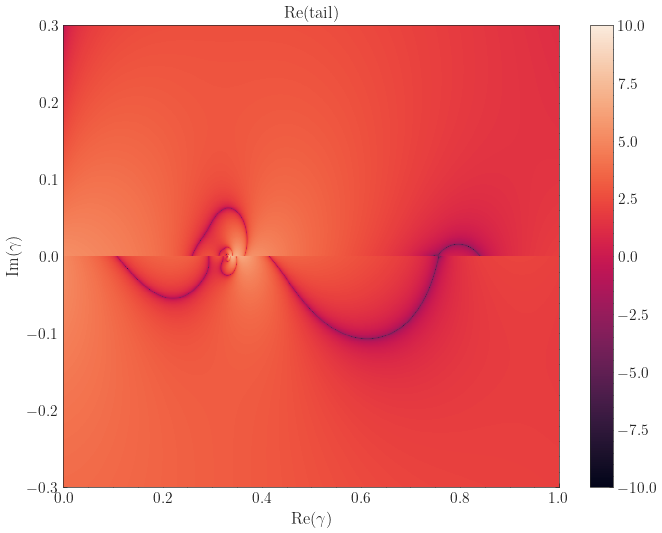

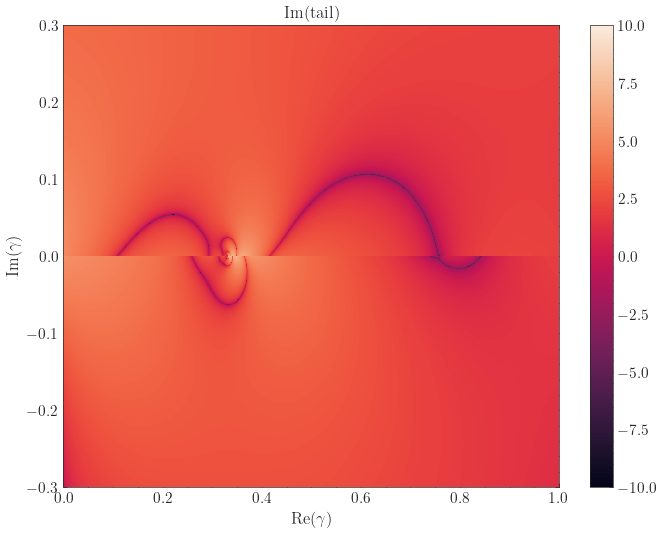

In [59]:
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=-10, vmax=10)
fig = plt.figure(figsize=(8,6))
plt.pcolormesh(a,b,np.log(np.abs(e.real.T)),norm=norm)
plt.title("Re(tail)")
plt.colorbar()
plt.xlabel('Re($\gamma$)')
plt.ylabel('Im($\gamma$)')
# plt.savefig(f'mricurv_scan_paper_re-ETA{elecd_arr[0]}-reso{res}-B0{np.round(B0,1)}-Bz{np.round(Bz,1)}-q{q_mag}-k{kn}-AR0.png')
plt.show()
fig = plt.figure(figsize=(8,6))
plt.pcolormesh(a,b,np.log(np.abs(e.imag.T)),norm=norm)
plt.title("Im(tail)")
plt.colorbar()
plt.xlabel('Re($\gamma$)')
plt.ylabel('Im($\gamma$)')
# plt.savefig(f'mricurv_scan_paper_im-ETA{elecd_arr[0]}-reso{res}-B0{np.round(B0,1)}-Bz{np.round(Bz,1)}-q{q_mag}-k{kn}-AR1.png')
plt.show()

In [10]:
e_str ='Scanplots/AR1-Bz20-Kep-5r1-scanplot-1k1-ETA0-qmagpi.pkl'

with open(e_str, 'rb') as f:
    e = pickle.load(f)   

<>:116: SyntaxWarning: invalid escape sequence '\O'
<>:116: SyntaxWarning: invalid escape sequence '\O'
C:\Users\Alex\AppData\Local\Temp\ipykernel_17376\256049665.py:116: SyntaxWarning: invalid escape sequence '\O'
  plt.title(f'$m={m}$, $k={kn}k_1$,' + ' $V_{A} = ' + f'{round(VA_N,3)}r_1\Omega_0$',fontsize=15)


(0.2835327415780306+0.027627940764975267j)
(8.376418983299166, 1.5350776003300166, 0, 0, 2.3116163496174815)


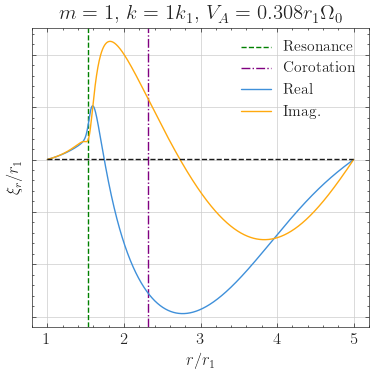

In [11]:
##### SET PARAMETERS #####
flow_type = 'Kep'
type = 'MCI'

if(flow_type == 'Kep'):
    flow_select = True
elif(flow_type == 'Tanh'):
    flow_select = 'tanh'
elif(flow_type == 'Sat'):
    flow_select = 'saturated'
elif(flow_type == 'Sh2'):
    flow_select = 'Sh2'
    
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

q = 1/2
r1 = .1
r2 = 5
r3 = 10

### MCI k = 1k1 (Kep.)
kn = 1
m = 1
kz = kn*np.pi/(4)
B0 = 0
Bz = 20
VA_N = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
eta = 0
elecd = eta
Pm = 0

elecd = 0
eta = elecd 
Pm = 1
guess = 0.2835327415779389+0.027627940765076926j

## PLOT ALL
r = np.linspace(1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)

reso = 2500
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)

guess0 = result.root
guess = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)

r = np.sqrt(y.t)
r_1 = r
u = y.y[0]
print(guess0)
r_vec = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(r_vec)

elecd = eta
k2 = k2r_curr(r) + 1j*k2i_curr(r)
W = 1/r**(3/2)
w = guess0
wb = w-m*W
elecd_scale = elecd / (r1**2*Omega0)
Weta = wb - 1j*elecd_scale*k2

vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
vAp = vAp1/r
wA = (m/r)*vAp + kz*vAz

plt.figure(figsize=(4,4))
for j in range(0,len(r_vec)):
    if(j == 0):
        if(r_vec[j] <= r2):
            # print('ah1')
            if(r_vec[j] != 0):
                # print('ah')
                plt.axvline(x=r_vec[0].real, color='green',ls='--', label='Resonance')
    else:
        if(r_vec[j] <= r2):
            if(r_vec[j] != 0):
                if(j==1):
                    plt.axvline(x=r_vec[j].real, color='green',ls='--', label = 'Resonance')
                if(j==4):
                    plt.axvline(x=r_vec[j].real, color='purple',ls='-.', label = 'Corotation')
                
scale = 10
W = 1/r**(3/2)
lamb = -1j*guess
l_eta = lamb + 1j*m*W + eta/(r1**2*Omega0)*(k2)
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])

plt.plot(r,scale*(u/r).real, label='Real', color = color_arr[0])
plt.plot(r,scale*(u/r).imag, label='Imag.', color = color_arr[1])
plt.plot(r,0*r, 'k--')
f = 12
plt.xlabel(r'$r/r_1$',fontsize=f)
plt.ylabel(r'$\xi_r/r_1$',fontsize=f)
plt.title(f'$m={m}$, $k={kn}k_1$,' + ' $V_{A} = ' + f'{round(VA_N,3)}r_1\Omega_0$',fontsize=15)
plt.legend(loc='upper right')
plt.xticks(fontsize=f)
plt.yticks(fontsize=f)
plt.tight_layout()
VA_N_plot = np.round(VA_N, 3)
plt.yticks(color='w')

# VA_N = 0.463
VA_N_str = np.round(VA_N,3)
VA_N_strs = str(VA_N_str).split(".")[1][:1000]

# plt.savefig(f'Potentials-Non-Ideal/Mode-Structure/' + type + f'_{kn}k1-modestructure' +'-' + flow_type + f'-{r2}r1-Bz-vA0p' + VA_N_strs  + f'-ETA{int(eta)}-Pm{int(Pm)}' + '.png', bbox_inches='tight', dpi = 500)
# plt.savefig(f'Potentials-Non-Ideal/Mode-Structure/' + type + f'_{kn}k1-modestructure' +'-' + flow_type + f'-{r2}r1-Bz-vA0p' + VA_N_strs  + f'-ETA{int(eta)}-Pm{int(Pm)}' + '.svg', format = 'svg',bbox_inches='tight')
plt.show()    

r_MCI = r
u_MCI = u

<>:115: SyntaxWarning: invalid escape sequence '\O'
<>:115: SyntaxWarning: invalid escape sequence '\O'
C:\Users\Alex\AppData\Local\Temp\ipykernel_17376\3168049345.py:115: SyntaxWarning: invalid escape sequence '\O'
  plt.title(f'$m={m}$, $k={kn}k_1$,' + ' $V_{A} = ' + f'{round(VA_N,3)}r_1\Omega_0$',fontsize=15)


(0.7567083853060066+0.002198177952786866j)
(8.376418983299166, 1.5350776003300166, 0, 0, 2.3116163496174815)


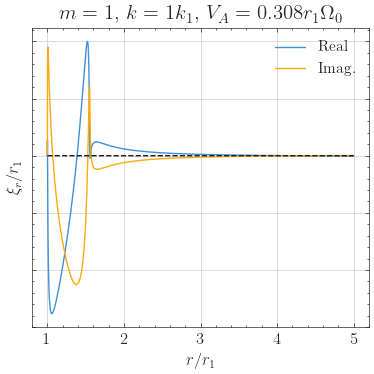

In [12]:
##### SET PARAMETERS #####
flow_type = 'Kep'
type = 'MRI'

if(flow_type == 'Kep'):
    flow_select = True
elif(flow_type == 'Tanh'):
    flow_select = 'tanh'
elif(flow_type == 'Sat'):
    flow_select = 'saturated'
elif(flow_type == 'Sh2'):
    flow_select = 'Sh2'
    
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

q = 1/2
r1 = .1
r2 = 5
r3 = 10

### MCI k = 1k1 (Kep.)
kn = 1
m = 1
kz = kn*np.pi/(4)
B0 = 0
Bz = 20
VA_N = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
eta = 0
elecd = eta
Pm = 0

elecd = 0
eta = elecd 
Pm = 1
guess2 = 0.7567083854674168+0.002198177950050427j

## PLOT ALL
r = np.linspace(1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)

reso = 2500
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess2*(1.00005+1e-6j), x1=guess2*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)

guess0 = result.root
guess2 = guess0
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess0,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)

r_2 = np.sqrt(y.t)
u2 = y.y[0]
print(guess0)
r_vec_2 = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(r_vec)

elecd = eta
k2 = k2r_curr(r) + 1j*k2i_curr(r)
W = 1/r**(3/2)
w = guess0
wb = w-m*W
elecd_scale = elecd / (r1**2*Omega0)
Weta = wb - 1j*elecd_scale*k2

vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
vAp = vAp1/r
wA = (m/r)*vAp + kz*vAz

plt.figure(figsize=(4,4))
# for j in range(0,len(r_vec)):
#     if(j == 0):
#         if(r_vec_2[j] <= r2):
#             # print('ah1')
#             if(r_vec_2[j] != 0):
#                 # print('ah')
#                 plt.axvline(x=r_vec[0].real, color='green',ls='--', label='Resonance')
#     else:
#         if(r_vec_2[j] <= r2):
#             if(r_vec_2[j] != 0):
#                 if(j==1):
#                     plt.axvline(x=r_vec_2[j].real, color='green',ls='--', label = 'Resonance')
#                 if(j==4):
#                     plt.axvline(x=r_vec_2[j].real, color='purple',ls='-.', label = 'Corotation')
                
scale = 10
W = 1/r**(3/2)
lamb = -1j*guess
l_eta = lamb + 1j*m*W + eta/(r1**2*Omega0)*(k2)
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])

plt.plot(r_2,scale*(u2/r_2).real, label='Real', color = color_arr[0])
plt.plot(r_2,scale*(u2/r_2).imag, label='Imag.', color = color_arr[1])
plt.plot(r_2,0*r_2, 'k--')
f = 12
plt.xlabel(r'$r/r_1$',fontsize=f)
plt.ylabel(r'$\xi_r/r_1$',fontsize=f)
plt.title(f'$m={m}$, $k={kn}k_1$,' + ' $V_{A} = ' + f'{round(VA_N,3)}r_1\Omega_0$',fontsize=15)
plt.legend(loc='upper right')
plt.xticks(fontsize=f)
plt.yticks(fontsize=f)
plt.tight_layout()
VA_N_plot = np.round(VA_N, 3)
plt.yticks(color='w')

# VA_N = 0.463
VA_N_str = np.round(VA_N,3)
VA_N_strs = str(VA_N_str).split(".")[1][:1000]

# plt.savefig(f'Potentials-Non-Ideal/Mode-Structure/' + type + f'_{kn}k1-modestructure' +'-' + flow_type + f'-{r2}r1-Bz-vA0p' + VA_N_strs  + f'-ETA{int(eta)}-Pm{int(Pm)}' + '.png', bbox_inches='tight', dpi = 500)
# plt.savefig(f'Potentials-Non-Ideal/Mode-Structure/' + type + f'_{kn}k1-modestructure' +'-' + flow_type + f'-{r2}r1-Bz-vA0p' + VA_N_strs  + f'-ETA{int(eta)}-Pm{int(Pm)}' + '.svg', format = 'svg',bbox_inches='tight')
plt.show()    

r_MCI = r
u_MCI = u

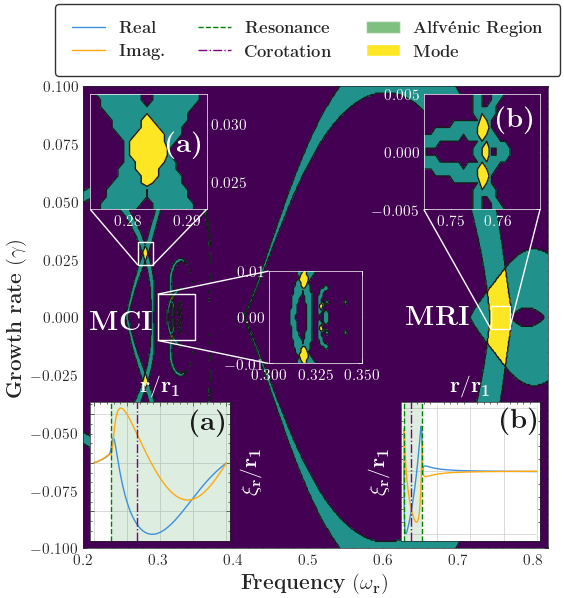

In [15]:
sns.color_palette("mako", as_cmap=True)
plt.style.use('science')
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.patches import Rectangle
tol =1
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from matplotlib.lines import Line2D


fig, ax = plt.subplots(figsize=(6, 6))
zerosr = (np.abs(e.real.T)) < tol
zerosim = (np.abs(e.imag.T)) < tol
all = zerosr.astype(int) + zerosim.astype(int)
# ax.pcolormesh(a,b,all, cmap= 'viridis', rasterized=True)
levels = [0,1]
contour = ax.contourf(a,b,all, cmap= 'viridis', levels = levels, extend='both')
ax.contour(contour, colors='k', linewidths=1)

######## MRI
ax_inset = inset_axes(ax, width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.tick_params(axis='both', labelcolor='white', colors='white')
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
ax_inset.set_xlabel(r'$r/r_1$', color = 'w')
ax_inset.plot(r_2, (u2/r_2).real/np.max(np.abs((u2/r_2))), color = color_arr[0])
ax_inset.plot(r_2, (u2/r_2).imag/np.max(np.abs((u2/r_2))), color = color_arr[1])
ax_inset.set_xlim(0.9,5.1)
ax_inset.set_ylim(-1.1,1.1)
ax_inset.set_ylabel(r'$\mathbf{\xi_r/r_1}$', color = 'w', fontsize = 16)
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', color = 'w', fontsize = 16)
ax_inset.text(r2-1.1, 0.7, r'\textbf{(b)}', fontsize=20, color = 'k', fontweight="bold")
ax_inset.set_zorder(3)
ax_inset.set_clip_on(False) 
x1 = r_vec_2[1]
x2 = r_vec_2[0]
rect = patches.Rectangle((x1, -2), x2 - x1, 4*1 - -2*1, linewidth=0, edgecolor='none', facecolor='g', alpha=0.2)
ax_inset.add_patch(rect)
for j in range(0,len(r_vec_2)):
    if(j == 0):
        if(r_vec_2[j] <= r2):
            # print('ah1')
            if(r_vec_2[j] != 0):
                # print('ah')
                ax_inset.axvline(x=r_vec_2[0].real, color='green',ls='--')
    else:
        if(r_vec_2[j] <= r2):
            if(r_vec_2[j] != 0):
                if(j!=4):
                    ax_inset.axvline(x=r_vec_2[j].real, color='green',ls='--')
                if(j==4):
                    ax_inset.axvline(x=r_vec_2[j].real, color='purple',ls='-.')

######### MCI
ax_inset = inset_axes(ax, width="30%", height="30%", loc='lower left')
ax_inset.set_xticks(range(1,6))
ax_inset.set_ylabel(r'$\mathbf{\xi_r/r_1}$', color = 'w', fontsize = 16)
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', color = 'w', fontsize = 16)
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.yaxis.set_tick_params(labelright=True)
ax_inset.yaxis.set_label_position('right')
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
ax_inset.set_xticks(range(1,6))
ax_inset.set_xlim(0.9,5.1)
ax_inset.set_ylim(-1.6,1.25)
ax_inset.plot(r_1, (u/r_1).real, color = color_arr[0])
ax_inset.plot(r_1, (u/r_1).imag, color = color_arr[1])
ax_inset.yaxis.set_tick_params(labelright=True)
ax_inset.yaxis.set_label_position('right')
for j in range(0,len(r_vec)):
    if(j == 0):
        if(r_vec[j] <= r2):
            # print('ah1')
            if(r_vec[j] != 0):
                # print('ah')
                ax_inset.axvline(x=r_vec[0].real, color='green',ls='--')
    else:
        if(r_vec[j] <= r2):
            if(r_vec[j] != 0):
                if(j!=4):
                    ax_inset.axvline(x=r_vec[j].real, color='green',ls='--')
                if(j==4):
                    ax_inset.axvline(x=r_vec[j].real, color='purple',ls='-.')

ax_inset.set_zorder(3)
ax_inset.set_clip_on(False) 
ax_inset.text(r2-1.1, 0.7, r'\textbf{(a)}', fontsize=20, color = 'k', fontweight="bold")
x1 = r_vec[1]
x2 = r_vec[0]
rect = patches.Rectangle((x1, -2), x2 - x1, 4*1 - -2*1, linewidth=0, edgecolor='none', facecolor='g', alpha=0.2)
ax_inset.add_patch(rect) 
        
# INSET AXIS WITH PLOT ZOOM for MRI
y_min, y_max = guess2.imag-0.005, guess2.imag+0.005 # Adjust based on your data
y_min, y_max = -0.005, +0.005 # Adjust based on your data
x_min, x_max = guess2.real-0.025/2, guess2.real+0.025/2

ax_inset = inset_axes(ax, width="25%", height="25%", loc="upper right")  # Adjust size and position
tol = 0.03
zerosr = (np.abs(e.real.T)) < tol
zerosim = (np.abs(e.imag.T)) < tol
all = zerosr.astype(int) + zerosim.astype(int)
contour = ax_inset.contourf(a,b,all, cmap= 'viridis', levels = levels, extend='both')
ax_inset.contour(contour, colors='k', linewidths=1)
ax_inset.set_ylim(y_min,y_max)
ax_inset.set_xlim(x_min,x_max)
ax_inset.tick_params(axis='both', labelcolor='white', colors='white')
ax_inset.text(guess2.real+0.003, guess2.imag, r'\textbf{(b)}', fontsize=20, color = 'w', fontweight="bold")
mark_inset(ax, ax_inset, loc1=3, loc2=4, fc="none", ec="w", zorder = 3)
for spine in ax_inset.spines.values():
    spine.set_edgecolor('w')  # Change 'red' to any color you prefer
y_min, y_max = guess.imag-0.005, guess.imag+0.005 # Adjust based on your data
x_min, x_max = guess.real-0.05/5, guess.real+0.05/5
ax_inset = inset_axes(ax, width="25%", height="25%", loc="upper left")  # Adjust size and position
tol = 1
zerosr = (np.abs(e.real.T)) < tol
zerosim = (np.abs(e.imag.T)) < tol
all = zerosr.astype(int) + zerosim.astype(int)
contour = ax_inset.contourf(a,b,all, cmap= 'viridis', levels = levels, extend='both')
ax_inset.contour(contour, colors='k', linewidths=1)
ax_inset.set_ylim(y_min,y_max)
ax_inset.set_xlim(x_min,x_max)
ax_inset.yaxis.set_tick_params(labelright=True)
ax_inset.tick_params(axis='y', which='both', left=False, labelleft=False)
ax_inset.tick_params(axis='both', labelcolor='white', colors='white')
ax_inset.text(guess.real+0.003, guess.imag, r'\textbf{(a)}', fontsize=20, color = 'w', fontweight="bold")
mark_inset(ax, ax_inset, loc1=3, loc2=4, fc="none", ec="w", zorder = 3)
for spine in ax_inset.spines.values():
    spine.set_edgecolor('w')  # Change 'red' to any color you prefer
y_min, y_max = -0.01, 0.01 # Adjust based on your data
x_min, x_max = 0.3, 0.35

ax_inset = inset_axes(ax, width="20%", height="20%", loc="center")  # Adjust size and position
tol = 1.7
zerosr = (np.abs(e.real.T)) < tol
zerosim = (np.abs(e.imag.T)) < tol
all = zerosr.astype(int) + zerosim.astype(int)
contour = ax_inset.contourf(a,b,all, cmap= 'viridis', levels = levels, extend='both')
ax_inset.contour(contour, colors='k', linewidths=1)
ax_inset.set_ylim(y_min,y_max)
ax_inset.set_xlim(x_min,x_max)
ax_inset.yaxis.set_label_position('right')
ax_inset.tick_params(axis='both', labelcolor='white', colors='white')
mark_inset(ax, ax_inset, loc1=2, loc2=3, fc="none", ec="w", zorder = 3)
for spine in ax_inset.spines.values():
    spine.set_edgecolor('w')  # Change 'red' to any color you prefer
    
 
#############################################################################################   
# ######## MRI
highlight_x = guess2.real
highlight_y = guess2.imag

ax.text(highlight_x-0.125, highlight_y-0.005, r'\textbf{MRI}', fontsize=20, color = 'w', fontweight="bold")
ax.text(0.21, 0.0-0.005, r'\textbf{MCI}', fontsize=20, color = 'w', fontweight="bold")


# ax.text(0.45, -0.09, 'Alfvénic \n Region', fontsize=20, color = 'w', fontweight="bold")
# # Create an arrow with a border
# arrow = FancyArrowPatch(
#     posA=(0.575, -0.08), posB=(0.62, -0.08), 
#     arrowstyle="->", mutation_scale=25, 
#     linewidth=4, edgecolor="g", facecolor="w", zorder=5
# )
# ax.add_patch(arrow)
# arrow = FancyArrowPatch(
#     posA=(0.44, -0.08), posB=(0.39, -0.08), 
#     arrowstyle="->", mutation_scale=25, 
#     linewidth=4, edgecolor="g", facecolor="w", zorder=5
# )
# ax.add_patch(arrow)

ax.set_ylabel(r'\textbf{Growth rate} ($\mathbf{\gamma}$)', fontsize=15)
ax.set_xlabel(r'\textbf{Frequency} ($\mathbf{\omega_r}$)', fontsize=15)
ax.set_ylim(-0.1, 0.1)
ax.set_xlim(0.2,0.82)
elecd_arr = [0]

lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

Real = Line2D([0], [0], color=color_arr[0], linestyle='-', label='Real')
Imag = Line2D([0], [0], color=color_arr[1], linestyle='-', label='Imag.')
Reson = Line2D([0], [0], color='green', linestyle='--', label='Resonance')
Corot = Line2D([0], [0], color='purple', linestyle='-.', label='Corotation')
# Add the dummy entries to the legend

from matplotlib.patches import Patch

lines += [Real, Imag, Reson, Corot]
labels += [r'\textbf{Real}', r'\textbf{Imag.}', r'\textbf{Resonance}', r'\textbf{Corotation}']

# Define a custom Patch for the shaded box
shaded_patch = Patch(facecolor='green', alpha=0.5, label='Shaded Region')
shaded_patch2 = Patch(facecolor='#FDE725', alpha=1, label='Shaded Region')

# Add the shaded patch to the legend
lines += [shaded_patch, shaded_patch2]
labels += [r'\textbf{Alfvénic Region}', r'\textbf{Mode}']

# Create the legend below the plot
fig.legend(lines, labels, loc='lower center', ncol=3, 
           bbox_to_anchor=(0.5, .87),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)


plt.savefig(f'Scanplots/overlap_lowb-ETA{elecd_arr[0]}-reso{res}-B0{np.round(B0,0)}-Bz20-q{q_mag}-k{kn}-Kep-5r1-poster.pdf', bbox_inches = 'tight')

plt.show()